In [17]:
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import quandl 
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [2]:
data = quandl.get('Wiki/GOOGL')

In [3]:
data.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0,0.0,1.0,1092.57,1108.70,1087.21,1094.00,1990515.0
2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0,0.0,1.0,1080.01,1083.92,1049.64,1053.15,3418154.0
2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0,0.0,1.0,1051.37,1066.78,1024.87,1026.55,2413517.0
2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0,0.0,1.0,1050.60,1059.27,1010.58,1054.09,3272409.0
2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0,0.0,1.0,1063.90,1064.54,997.62,1006.94,2940957.0


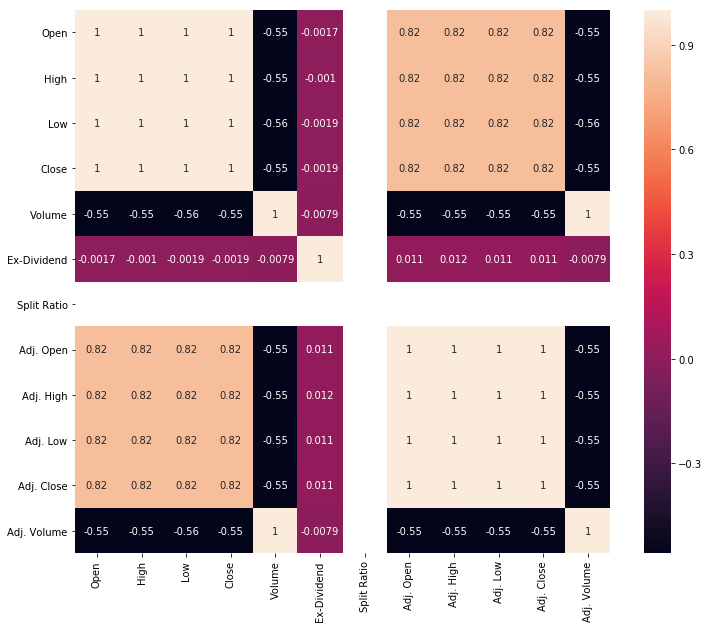

In [18]:
sns.heatmap(data.corr(), annot=True);

Видим, что корреляция объема и среднего объема = 1(то есть один явно выражается через другой линейным образом). Проверим, идентичны ли эти столбцы, если да, то выкинем показатель "Объем".

In [19]:
print(all(data["Volume"]==data["Adj. Volume"]))

True


Заметим, что "Split Ratio" нет никакой корреляции с искомой величиной, выбросим и её. 

In [ ]:
data.drop(["Volume", "Split Ratio"],axis = 1, inplace = True)

In [22]:
data.head()

,Open,High,Low,Close,Ex-Dividend,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,0.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,0.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,0.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,0.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,0.0,52.542193,54.167209,52.100830,53.164113,9188600.0


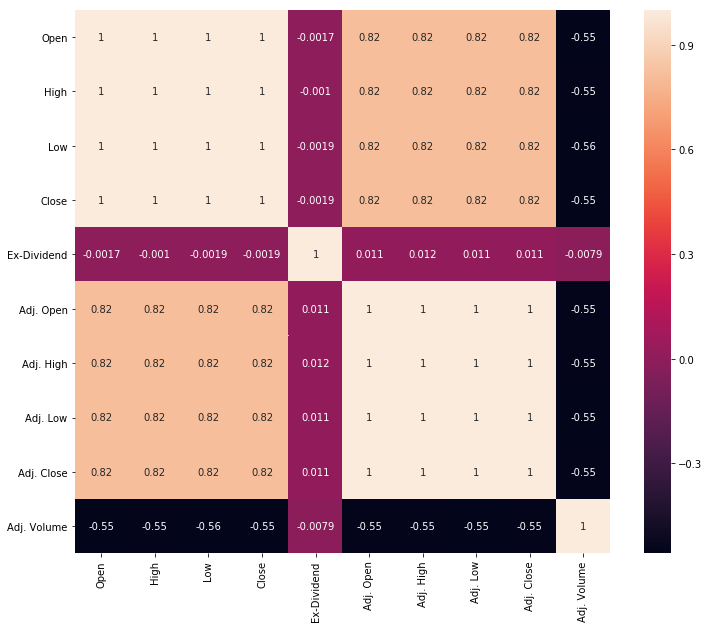

In [23]:
sns.heatmap(data.corr(), annot=True);

Существует еще один элемент, который очень слабо линейно связан со всеми остальными - Ex-Dividend. Для того, чтобы он не придавал лишние веса нашей модели выбросим его, из-за его слабой связности.

In [25]:
data.drop(["Ex-Dividend"],axis = 1, inplace = True)

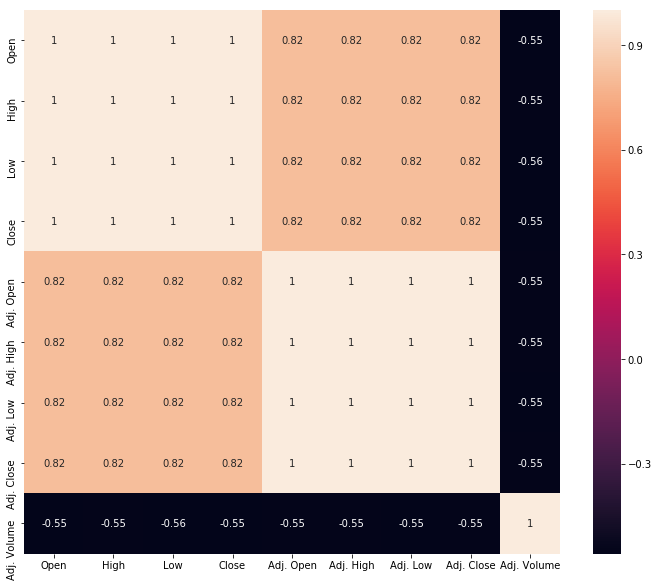

In [26]:
sns.heatmap(data.corr(), annot=True);

Теперь мы имеем данные, показатели которых все линейно связаны. Рассмотрим их поближе

In [27]:
data.describe()

,Open,High,Low,Close,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03
mean,596.602610,602.045438,590.571710,596.352862,409.221461,412.786556,405.227809,409.057885,7.818568e+06
std,226.989782,227.783310,225.846581,226.896692,257.844081,259.366718,255.981628,257.773495,8.248211e+06
min,99.090000,101.740000,95.960000,100.010000,49.698414,51.027517,48.128568,50.159839,5.211410e+05
25%,461.157500,465.392500,456.065000,461.205000,231.292728,233.416785,228.738594,231.316552,2.430647e+06
50%,565.120000,569.599950,559.860000,564.940000,300.174109,302.496277,297.909618,300.264387,5.076200e+06
75%,735.627500,740.850000,728.680025,733.262500,561.178118,565.000000,556.673036,561.200000,1.020910e+07
max,1226.800000,1228.880000,1218.600000,1220.170000,1188.000000,1198.000000,1184.060000,1187.560000,8.215110e+07


In [28]:
features = [c for c in data.columns if c !="Close"]
target = "Close"

In [29]:
X = data[features]
y = data[target]

Разделим данные на валидационную и тестовую выборку в размере $\approx$ 80% и $\approx$ 20% соответственно 

In [69]:
X.shape[0]*0.8

2739.2000000000003

Следовательно, ближайшие число 2739.

Примечание: В данном случае мы не можем воспользоваться случайным разделением, так как моделирование зависит от времени и мы можем переобучить свою модель на данных будущего и она зная будущее, будет легко предсказывать прошлое. 

In [70]:
X_train, X_test, y_train,y_test = X[:2739],X[2739:],y[:2739],y[2739:]

In [71]:
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true)*100

In [73]:
pred_train = lin.predict(X_train)

In [74]:
print("MAPE train = %.2f" % mean_absolute_percentage_error(y_train,pred_train),"%",sep='')

MAPE train = 0.09%


In [75]:
pred_test = lin.predict(X_test)

In [76]:
print("MAPE train = %.2f" % mean_absolute_percentage_error(y_test,pred_test),"%",sep='')

MAPE train = 0.27%


Визуализируем данные в зависимости от даты. И увидим хорошо ли справилась, наша логистическая регрессия. 

In [77]:
pred = np.concatenate((pred_train,pred_test))

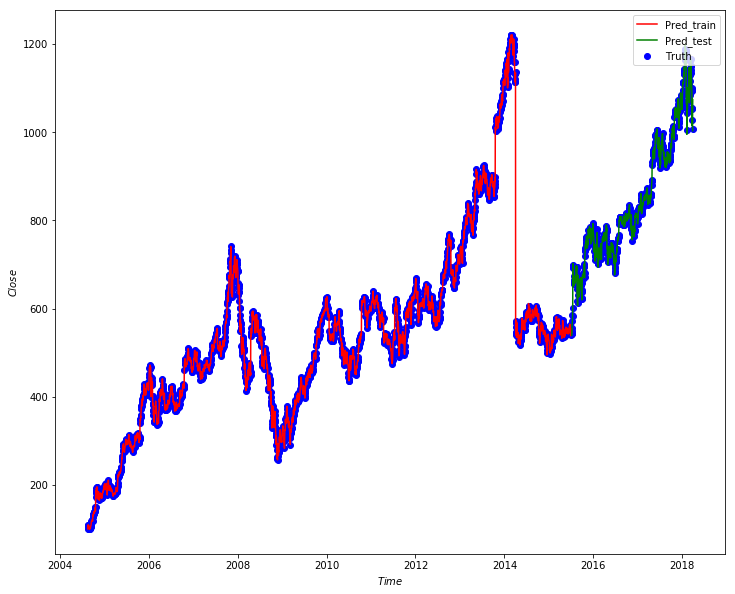

In [87]:
plt.scatter(data.index, y, color = 'blue',
            label = "Truth")
plt.plot(data.index[:2739], pred_train, color = 'red',
            label = "Pred_train")
plt.plot(data.index[2739:], pred_test, color = 'green',
            label = "Pred_test")

plt.xlabel(r"$Time$") 
plt.ylabel(r"$Close$") # Label for y-axis.
plt.legend(loc = 'upper right') # loc stands for 'location' of legend
plt.show();

Видим, что наша модель хорошо описывает полученные данные. Посмотрим на коэффициенты, которые получились.

In [83]:
for i,k in enumerate(features):
    print(k ,":",lin.coef_[i])
    

Open : -0.547452362597
High : 0.755195240514
Low : 0.793203046528
Adj. Open : 0.946187884033
Adj. High : -1.30049060392
Adj. Low : -1.38144115519
Adj. Close : 1.73403493981
Adj. Volume : 1.38651523596e-09
